# Correlograma e Teste de Estacionaridade

Verificar para quais defazagens existe autocorrelação significativa

Instalar os pacotes necessários

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, acf
from statsmodels.tsa.arima_process import ArmaProcess

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6 

### Exemplo ruído Branco

Neste caso simulamos 200 pontos de uma distribuição normal i.i.d.

Oberve que na defasagem 0 a correlação sempre será 1. E a partir dessa
defazagem observa-se todos os valores dentro do intervalo.

Podemso então dizer que essa série não tem autocorrelações

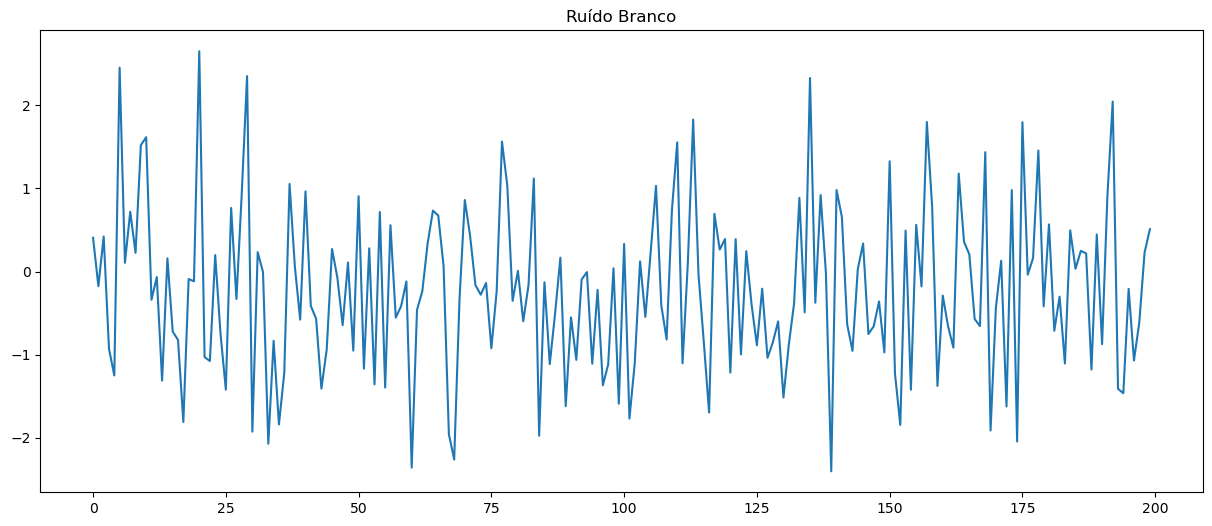

In [2]:
x1 = np.random.normal(size=200)
plt.plot(x1)
plt.title('Ruído Branco')
plt.show()

In [ ]:
# Gráfico de autocorrelação (ACF)
plot_acf(x1, lags=30)
plt.title('Correlograma - Ruído Branco')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

***Teste de Estacionaridade***

***Teste de Dickey-Fuller Aumentado (ADF)*** O teste de Dickey-Fuller
Aumentado (ADF) é um teste de hipótese usado para verificar a
estacionaridade de uma série temporal.

-   **Hipótese Nula (H0)**: A série temporal tem uma raiz unitária (não
    estacionária).

-   **Hipótese Alternativa (H1)**: A série temporal é estacionária (sem
    raiz unitária).

-   **Rejeitar H0 (valor** $p$ \< 0.05): A série é estacionária.

-   **Não rejeitar H0 (valor** $p$ \> 0.05): A série não é estacionária
    (tem raiz unitária).

In [ ]:
adf_result = adfuller(x1, autolag='AIC')
print('ADF Test: Ruído Branco')
print('Estatística do teste: {:.4f}'.format(adf_result[0]))
print('p-valor: {:.4f}'.format(adf_result[1]))
print('Valores Críticos:')
for chave, valor in adf_result[4].items():
    print('{}: {:.4f}'.format(chave, valor))
print('Resultado:')
if adf_result[1] <= 0.05:
    print("Rejeitar a hipótese nula (H0): Os dados são estacionários.")
else:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados não são estacionários.")
print('\n')



#### Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

O teste KPSS é usado para verificar a estacionaridade de uma série
temporal, mas ao contrário do teste ADF, sua hipótese nula é que a série
é estacionária.

##### Hipóteses:

-   **Hipótese Nula (H0)**: A série temporal é estacionária.

-   **Hipótese Alternativa (H1)**: A série temporal não é estacionária.

-   **Rejeitar H0 (valor KPSS grande )**: A série não é estacionária.

-   **Não rejeitar H0 (valor KPSS pequeno)**: A série é estacionária.


In [ ]:
kpss_result = kpss(x1, regression='c')
print('KPSS Test: Ruído Branco')
print('Estatística do teste: {:.4f}'.format(kpss_result[0]))
print('p-valor: {:.4f}'.format(kpss_result[1]))
print('Valores Críticos:')
for chave, valor in kpss_result[3].items():
    print('{}: {:.4f}'.format(chave, valor))
print('Resultado:')
if kpss_result[1] <= 0.05:
    print("Rejeitar a hipótese nula (H0): Os dados não são estacionários.")
else:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados são estacionários.")
print('\n')

### Exemplo 2 - Modelo AR(1) : X = 0.8Xt-1 + e

Observe que mesmo que alguns pontos fogem do zero, a média zero
permanece ao longo do tempo .

Como em um modelo autorregressivo o ponto posterior depende do ponto
anteriror observamos que a defasagem ainda tem valor, e isso acaba sendo
propagado para duas defazagens tres defasagens e assim sucessivamente.

Então apra interpretarmos esse grafico temos, seria o quanto xt depende
do xt-1 , oq uanto xt depende do xt-2 e assim sucessivamente


In [ ]:
ar1 = np.array([1, -0.8])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
x2 = AR_object1.generate_sample(nsample=200)
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(x2)
plt.title('Modelo AR(1): X = 0.8Xt-1 + e')
plt.show()

In [ ]:
# Gráfico de autocorrelação (ACF)
plot_acf(x2, lags=30)
plt.title('Correlograma - AR(1): 0.8')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

***Teste de Estacionaridade***

***Teste de Dickey-Fuller Aumentado (ADF)*** O teste de Dickey-Fuller
Aumentado (ADF) é um teste de hipótese usado para verificar a
estacionaridade de uma série temporal.

-   **Hipótese Nula (H0)**: A série temporal tem uma raiz unitária (não
    estacionária).

-   **Hipótese Alternativa (H1)**: A série temporal é estacionária (sem
    raiz unitária).

-   **Rejeitar H0 (valor** $p$ \< 0.05): A série é estacionária.

-   **Não rejeitar H0 (valor** $p$ \> 0.05): A série não é estacionária
    (tem raiz unitária).

In [ ]:
adf_result = adfuller(x2, autolag='AIC')
print('ADF Test: AR(1): 0.8')
print('Estatística do teste: {:.4f}'.format(adf_result[0]))
print('p-valor: {:.4f}'.format(adf_result[1]))
print('Valores Críticos:')
for chave, valor in adf_result[4].items():
    print('{}: {:.4f}'.format(chave, valor))
print('Resultado:')
if adf_result[1] <= 0.05:
    print("Rejeitar a hipótese nula (H0): Os dados são estacionários.")
else:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados não são estacionários.")
print('\n')


#### Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

O teste KPSS é usado para verificar a estacionaridade de uma série
temporal, mas ao contrário do teste ADF, sua hipótese nula é que a série
é estacionária.

##### Hipóteses:

-   **Hipótese Nula (H0)**: A série temporal é estacionária.

-   **Hipótese Alternativa (H1)**: A série temporal não é estacionária.

-   **Rejeitar H0 (valor KPSS grande )**: A série não é estacionária.

-   **Não rejeitar H0 (valor KPSS pequeno)**: A série é estacionária.


In [ ]:
kpss_result = kpss(x2, regression='c')
print('KPSS Test: AR(1): 0.8')
print('Estatística do teste: {:.4f}'.format(kpss_result[0]))
print('p-valor: {:.4f}'.format(kpss_result[1]))
print('Valores Críticos:')
for chave, valor in kpss_result[3].items():
    print('{}: {:.4f}'.format(chave, valor))
print('Resultado:')
if kpss_result[1] <= 0.05:
    print("Rejeitar a hipótese nula (H0): Os dados não são estacionários.")
else:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados são estacionários.")
print('\n')

### Exemplo 3 - Modelo AR(1) : X = -0.8Xt-1 + e

Agora observe que pela inclusão do sinal de menos a autocorrelaçõ
alterna entre positivo e negativo.

In [ ]:
ar2 = np.array([1, 0.8])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
x3 = AR_object2.generate_sample(nsample=200)
plt.figure(figsize=(12, 8))
plt.plot(x3)
plt.title('Modelo AR(1): X = -0.8Xt-1 + e')

In [ ]:
# Gráfico de autocorrelação (ACF)
plot_acf(x3, lags=30)
plt.title('Correlograma - AR(1): -0.8')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

***Teste de Estacionaridade***

***Teste de Dickey-Fuller Aumentado (ADF)*** O teste de Dickey-Fuller
Aumentado (ADF) é um teste de hipótese usado para verificar a
estacionaridade de uma série temporal.

-   **Hipótese Nula (H0)**: A série temporal tem uma raiz unitária (não
    estacionária).

-   **Hipótese Alternativa (H1)**: A série temporal é estacionária (sem
    raiz unitária).

-   **Rejeitar H0 (valor** $p$ \< 0.05): A série é estacionária.

-   **Não rejeitar H0 (valor** $p$ \> 0.05): A série não é estacionária
    (tem raiz unitária).

In [ ]:
adf_result = adfuller(x3, autolag='AIC')
print('ADF Test: AR(1): -0.8')
print('Estatística do teste: {:.4f}'.format(adf_result[0]))
print('p-valor: {:.4f}'.format(adf_result[1]))
print('Valores Críticos:')
for chave, valor in adf_result[4].items():
    print('{}: {:.4f}'.format(chave, valor))
print('Resultado:')
if adf_result[1] <= 0.05:
    print("Rejeitar a hipótese nula (H0): Os dados são estacionários.")
else:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados não são estacionários.")
print('\n')


#### Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

O teste KPSS é usado para verificar a estacionaridade de uma série
temporal, mas ao contrário do teste ADF, sua hipótese nula é que a série
é estacionária.

##### Hipóteses:

-   **Hipótese Nula (H0)**: A série temporal é estacionária.

-   **Hipótese Alternativa (H1)**: A série temporal não é estacionária.

-   **Rejeitar H0 (valor KPSS grande )**: A série não é estacionária.

-   **Não rejeitar H0 (valor KPSS pequeno)**: A série é estacionária.


In [ ]:
# Teste KPSS
kpss_result = kpss(x3, regression='c')
print('KPSS Test: AR(1): -0.8')
print('Estatística do teste: {:.4f}'.format(kpss_result[0]))
print('p-valor: {:.4f}'.format(kpss_result[1]))
print('Valores Críticos:')
for chave, valor in kpss_result[3].items():
    print('{}: {:.4f}'.format(chave, valor))
print('Resultado:')
if kpss_result[1] <= 0.05:
    print("Rejeitar a hipótese nula (H0): Os dados não são estacionários.")
else:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados são estacionários.")
print('\n')

### Exemplo 4 - Passeio aleatorio : Xt = Xt-1 + e

O passeio aleatorio depende exclusivamente do ponto anterior

O gráfico da série observamos que a media nao pe constante

No grafico ACF observamos um comportamento títico de séries não
estacionárias, observe como ele demora para chegar ao zero. Decaimento
lento e constante ao longo do tempo

In [ ]:
np.random.seed(0)
e = np.random.normal(size=200)
x4 = np.cumsum(e)
plt.figure(figsize=(12, 8))
plt.plot(x4)
plt.title('Passeio Aleatório')
plt.show()

In [ ]:
# Gráfico de autocorrelação (ACF)
plot_acf(x4, lags=30)
plt.title('PAsseio Aleatorio')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

***Teste de Estacionaridade***

***Teste de Dickey-Fuller Aumentado (ADF)*** O teste de Dickey-Fuller
Aumentado (ADF) é um teste de hipótese usado para verificar a
estacionaridade de uma série temporal.

-   **Hipótese Nula (H0)**: A série temporal tem uma raiz unitária (não
    estacionária).

-   **Hipótese Alternativa (H1)**: A série temporal é estacionária (sem
    raiz unitária).

-   **Rejeitar H0 (valor** $p$ \< 0.05): A série é estacionária.

-   **Não rejeitar H0 (valor** $p$ \> 0.05): A série não é estacionária
    (tem raiz unitária).

In [ ]:
# Teste ADF
adf_result = adfuller(x4, autolag='AIC')
print('ADF Test: Passeio Aleatório')
print('Estatística do teste: {:.4f}'.format(adf_result[0]))
print('p-valor: {:.4f}'.format(adf_result[1]))
print('Valores Críticos:')
for chave, valor in adf_result[4].items():
    print('{}: {:.4f}'.format(chave, valor))
print('Resultado:')
if adf_result[1] <= 0.05:
    print("Rejeitar a hipótese nula (H0): Os dados não têm raiz unitária e são estacionários.")
else:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados têm raiz unitária e não são estacionários.")
print('\n')


#### Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

O teste KPSS é usado para verificar a estacionaridade de uma série
temporal, mas ao contrário do teste ADF, sua hipótese nula é que a série
é estacionária.

##### Hipóteses:

-   **Hipótese Nula (H0)**: A série temporal é estacionária.

-   **Hipótese Alternativa (H1)**: A série temporal não é estacionária.

-   **Rejeitar H0 (valor KPSS grande )**: A série não é estacionária.

-   **Não rejeitar H0 (valor KPSS pequeno)**: A série é estacionária.


In [ ]:
kpss_result = kpss(x4, regression='c')
print('KPSS Test: Passeio Aleatório')
print('Estatística do teste: {:.4f}'.format(kpss_result[0]))
print('p-valor: {:.4f}'.format(kpss_result[1]))
print('Valores Críticos:')
for chave, valor in kpss_result[3].items():
    print('{}: {:.4f}'.format(chave, valor))
print('Resultado:')
if kpss_result[1] <= 0.05:
    print("Rejeitar a hipótese nula (H0): Os dados não são estacionários.")
else:
    print("Falha ao rejeitar a hipótese nula (H0): Os dados são estacionários.")
print('\n')
